In [1]:
import pandas as pd
import numpy as np
# bikesDiscretizado1
# bikesDiscretizado2
# bikesDiscretizado1Normalizado
# bikesDiscretizado2Normalizado
# bikesDiscretizado1Normalizado25
# bikesDiscretizado1Normalizado50
# bikesDiscretizado2Normalizado25
# bikesDiscretizado2Normalizado50

import matplotlib.pyplot as plt

arquivo = 'Convertido'
CaminhoArquivo = 'C:/Users/John/Desktop/Mineracao/projetoBikes/bikes' + arquivo +'.csv'
base = pd.read_csv(CaminhoArquivo, sep=';');
base.head()

,month,weekday,day,hour,workday,temperature,r_temperature,wind,humidity,dew_point,pressure,seasonN,qtd
0,1,1,1,0,0,8,5,15,37,-6,1015,1,77
1,1,1,1,1,0,7,4,15,38,-6,1015,1,80
2,1,1,1,2,0,6,3,18,44,-5,1016,1,62
3,1,1,1,3,0,6,3,14,48,-5,1017,1,18
4,1,1,1,4,0,5,3,7,50,-5,1017,1,5


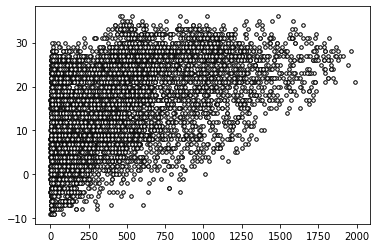

Done.


In [2]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

df = base.values
X = df

# [0] month | [1] weekday | [2] day | [3]  hour | [4] workday | [5] temperature | [6] r_temperature
# | [7] wind | [8] humidity | [9] dew_point | [10] pressure | [11] seasonN | [12] qtd

# plot
plt.scatter(
   X[:, 12], X[:, 5],
   c='white', marker='.',
   edgecolor='black', s=50
)
plt.show()
print('Done.')

In [3]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

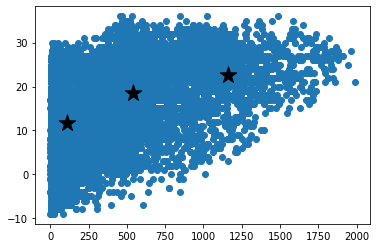

In [22]:
# plot the 3 clusters
# plt.scatter(
#     X[:,0], X[:,1],
#     s=50, c='lightgreen',
#     marker='s', edgecolor='black',
#     label='cluster 1'
# )

# plt.scatter(
#     X[y_km == 1, 0], X[y_km == 1, 1],
#     s=50, c='orange',
#     marker='o', edgecolor='black',
#     label='cluster 2'
# )

# plt.scatter(
#     X[y_km == 2, 0], X[y_km == 2, 1],
#     s=50, c='lightblue',
#     marker='v', edgecolor='black',
#     label='cluster 3'
# )

# plt.scatter(X[:,0], X[:,1])
# plt.show()

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

plt.scatter(X[:,12], X[:,5])
plt.scatter(kmeans.cluster_centers_[:, 12], kmeans.cluster_centers_[:, 5], s=300, c='black', marker='*')

plt.savefig('Imagens/Experimentos/KMeansTemp', bbox_inches='tight')
plt.show()

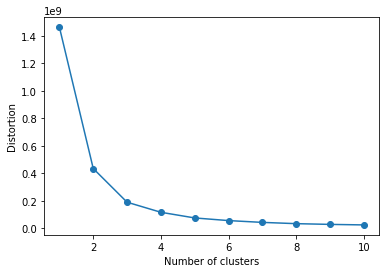

In [16]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.savefig('Imagens/Experimentos/ElbowMethod', bbox_inches='tight')
plt.show()